# Intensity Transformations

In [3]:
# import necessary Libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#### What is `Lookup Table` ?

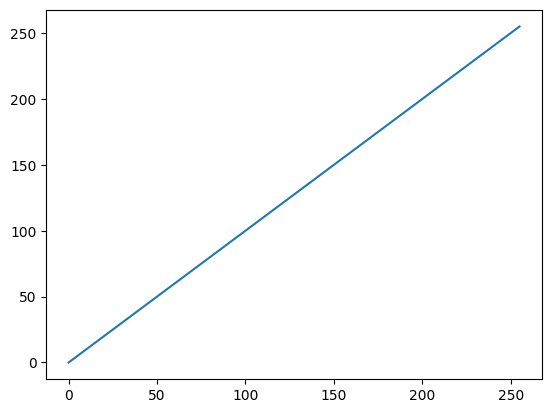

In [4]:
f = cv.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)
assert f is not None
t = np.arange(256, dtype=np.uint8) # lookup table

plt.plot(t)

In [5]:
print(t.shape)
print(t.dtype)
print(t)

(256,)
uint8
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 2

### Identity Transformation

In [6]:
print(f==t[f])

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


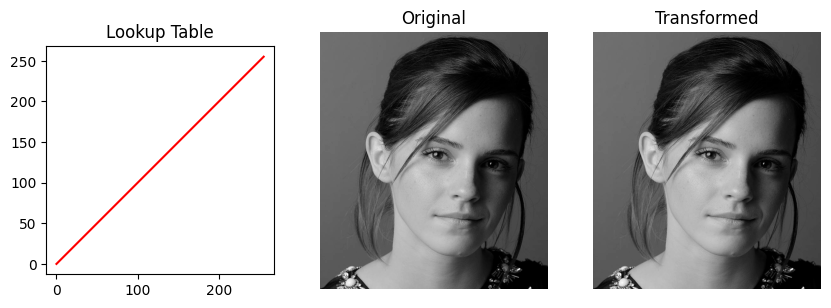

In [7]:
g = t[f]

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].plot(t, 'r', label='Transformation')
ax[0].set_title('Lookup Table')
ax[0].set_aspect('equal')
ax[1].imshow(f, cmap='gray')
ax[1].set_title('Original')
ax[1].axis('off') 
ax[2].imshow(g, cmap='gray')
ax[2].set_title('Transformed')
ax[2].axis('off')
plt.show()

# no effect because of identity transformation

## Using cv.LUT() function

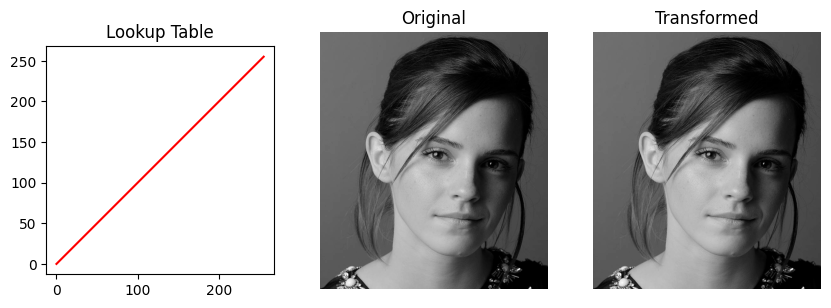

In [8]:
# same thing like before
g = cv.LUT(f, t)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].plot(t, 'r', label='Transformation')
ax[0].set_title('Lookup Table')
ax[0].set_aspect('equal')
ax[1].imshow(f, cmap='gray')
ax[1].set_title('Original')
ax[1].axis('off')
ax[2].imshow(g, cmap='gray')
ax[2].set_title('Transformed')
ax[2].axis('off')
plt.show()

## Image Negative

In [9]:
t = np.arange(255,-1 ,-1, dtype=np.uint8) # lookup table
g = cv.LUT(f, t)

# use opencv to display this
cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', f)
cv.waitKey(0) # press any kry to next
cv. imshow('Image', g)
cv.waitKey(0) # press any kry to next
cv.destroyAllWindows()

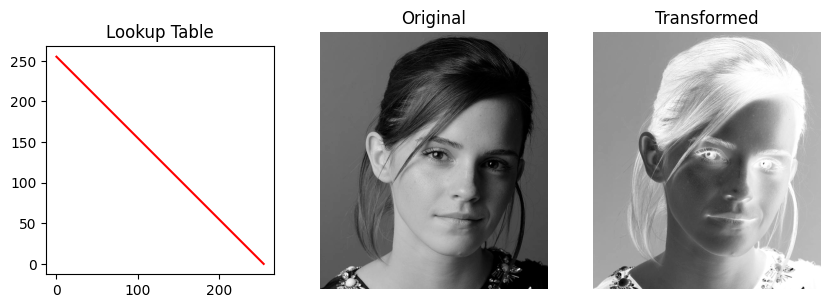

In [10]:
# plot normally
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].plot(t, 'r', label='Transformation')
ax[0].set_title('Lookup Table')
ax[0].set_aspect('equal')
ax[1].imshow(f, cmap='gray')
ax[1].set_title('Original')
ax[1].axis('off')
ax[2].imshow(g, cmap='gray')
ax[2].set_title('Transformed')
ax[2].axis('off')
plt.show()

**Example for mammography images**

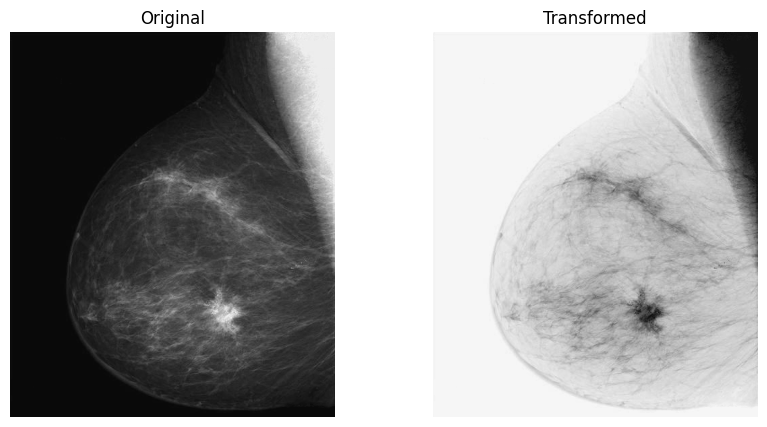

In [11]:
f = cv.imread('images/Fig0304(a)(breast_digital_Xray).tif', cv.IMREAD_GRAYSCALE)
assert f is not None
t = np.arange(255,-1 ,-1, dtype=np.uint8) # lookup table
g = cv.LUT(f, t)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(f, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(g, cmap='gray')
ax[1].set_title('Transformed')
ax[1].axis('off')
plt.show()

# easy to seen tumor areas

## Intensity Windowing

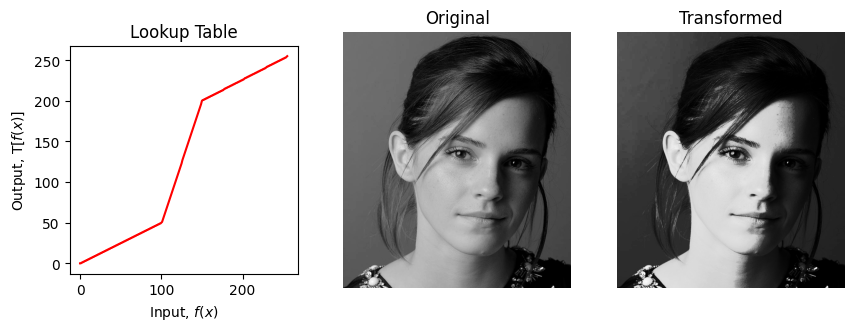

In [12]:
f = cv.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)
assert f is not None

c= np.array([(100, 50), (150, 200)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
# print(len(t1))
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
# print(len(t2))
t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8')
# print(len(t3))

t = np.concatenate((t1, t2), axis=0).astype('uint8')
t = np.concatenate((t, t3), axis=0).astype('uint8')
# print(len(t))

g = cv.LUT(f, t)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].plot(t, 'r', label='Transformation')
ax[0].set_xlabel(r'Input, $f(x)$')
ax[0].set_ylabel(r'Output, $\mathrm{T}[f(x)]$')
ax[0].set_title('Lookup Table')
ax[0].set_aspect('equal')
ax[1].imshow(f, cmap='gray')
ax[1].set_title('Original')
ax[1].axis('off')
ax[2].imshow(g, cmap='gray')
ax[2].set_title('Transformed')
ax[2].axis('off')
plt.show()

## Gamma Corrections

#### To enhace dark areas

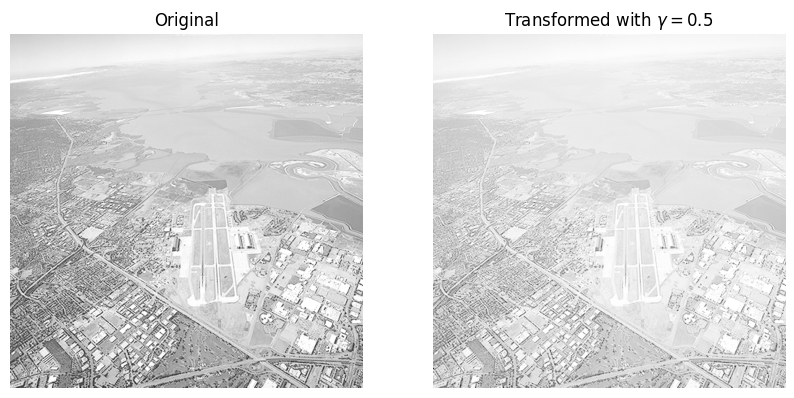

In [13]:
f = cv.imread('images/Fig0309(a)(washed_out_aerial_image).tif', cv.IMREAD_GRAYSCALE)
assert f is not None

gamma = 0.5 # to enhace dark areas
t = np.array([(i/255)**gamma*255 for i in range(256)], dtype=np.uint8)
g = cv.LUT(f, t)

fig, ax = plt.subplots(1, 2,figsize=(10, 5))
ax[0].imshow(f, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(g, cmap='gray')
# Set title with gamma value
ax[1].set_title(r'Transformed with $\gamma = {0}$'.format(gamma))
ax[1].axis('off')
plt.show()

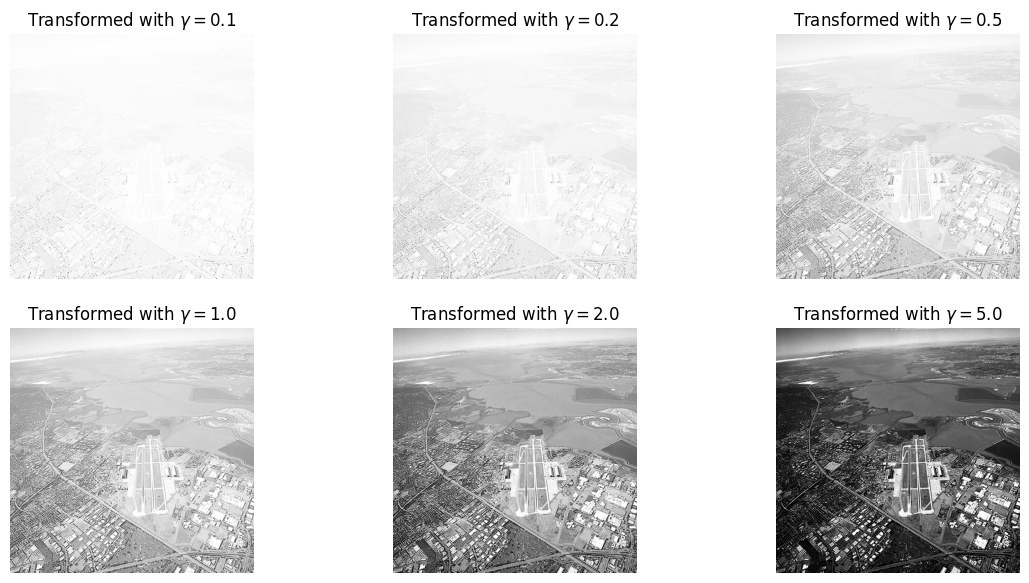

In [14]:
gamma = [0.1, 0.2, 0.5, 1.0, 2.0, 5.0]

fig, ax = plt.subplots(2, 3,figsize=(14, 7))

for j in range (len(gamma)):
    t = np.array([(i/255)**gamma[j]*255 for i in range(256)], dtype=np.uint8)
    g = cv.LUT(f, t)

    ax[j // 3, j % 3].imshow(g, cmap='gray')
    ax[j // 3, j % 3].set_title(r'Transformed with $\gamma = {0}$'.format(gamma[j]))
    ax[j // 3, j % 3].axis('off')

plt.show()

# Histogram

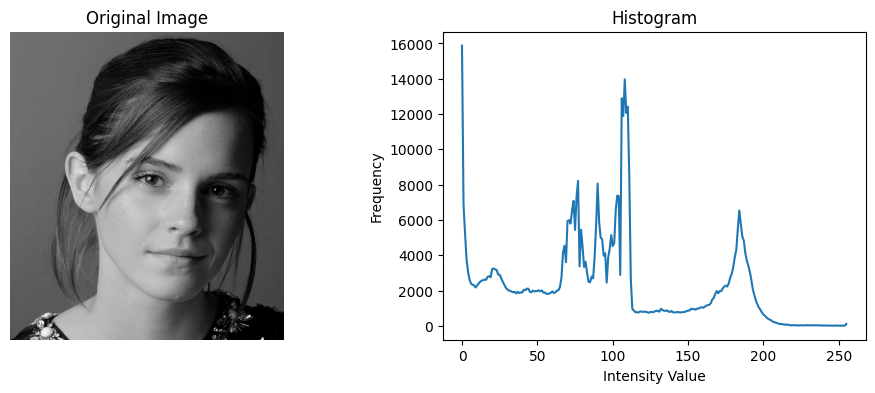

In [23]:
# Histrogram Using Numpy
f = cv.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)

hist, bins = np.histogram(f.ravel(), 256, [0, 256])

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].plot(hist)
ax[1].set_title('Histogram')
ax[1].set_xlabel('Intensity Value')
ax[1].set_ylabel('Frequency')
plt.show()

### Histogram Equalization using OpenCV

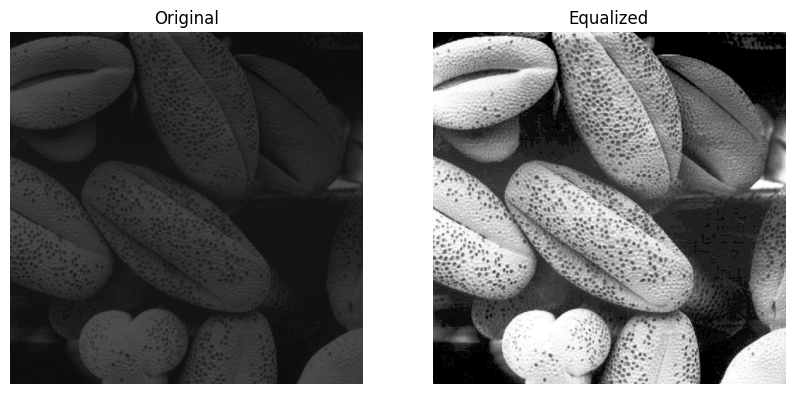

In [29]:
f = cv.imread('images/shells.tif', cv.IMREAD_GRAYSCALE)
assert f is not None

g = cv.equalizeHist(f)

fig, ax = plt.subplots(1, 2,figsize=(10, 5))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Equalized')
ax[1].axis('off')
plt.show()

### Histogram Equalization using Equation

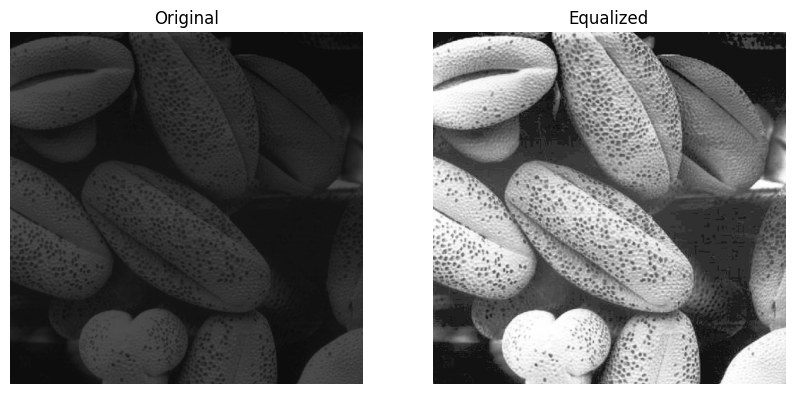

In [31]:
M, N = f.shape

h = cv.calcHist([f], [0], None, [256], [0, 256]) # calculates the histogram of an image
cdf = np.cumsum(h) # calculates the cumulative distribution function (CDF) of the histogram
L = 256
t = np.uint8((L -1) *cdf / (M*N))
g =t[f]

fig, ax = plt.subplots(1, 2,figsize=(10, 5))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Equalized')
ax[1].axis('off')
plt.show()

#### How change histogram...

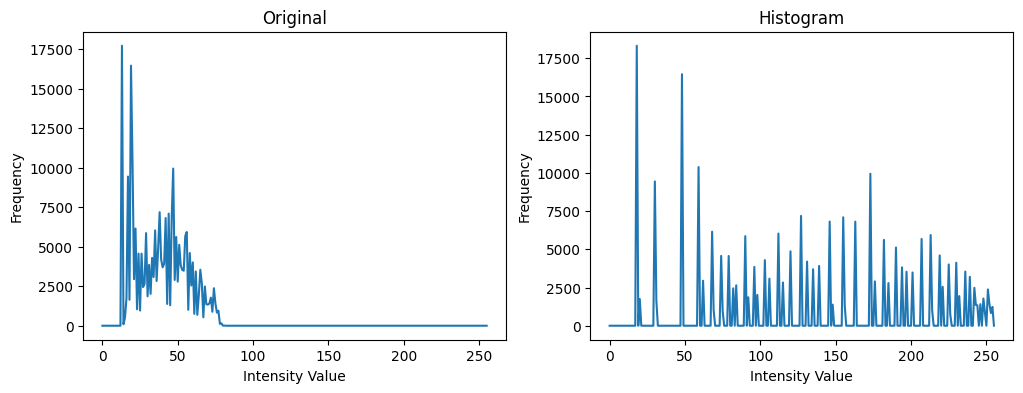

In [34]:
f_hist = cv.calcHist([f], [0], None, [256], [0, 256])
g_hist = cv.calcHist([g], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(f_hist)
ax[0].set_title('Original')
ax[0].set_xlabel('Intensity Value')
ax[0].set_ylabel('Frequency')
ax[1].plot(g_hist)
ax[1].set_title('Histogram')
ax[1].set_xlabel('Intensity Value')
ax[1].set_ylabel('Frequency')
plt.show()

# Spatial Filtering

#### `Average filtering` using cv.filter2D

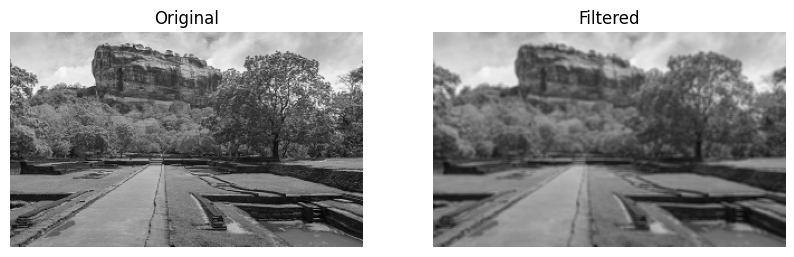

In [37]:
# Kernal size is 3
f = cv.imread('images/sigiriya.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None

kernel = np.ones((3,3),np.float32)/9 # 3*3 kernal with sum of 9

g = cv.filter2D(im, cv.CV_32F, kernel)

fig, ax = plt.subplots(1, 2,figsize=(10, 5))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Filtered')
ax[1].axis('off')
plt.show()

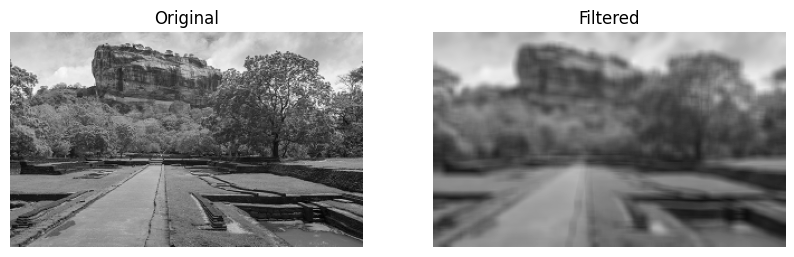

In [38]:
# changing Kernal size
f = cv.imread('images/sigiriya.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None

k_s = 7
kernel = np.ones((k_s,k_s),np.float32)/k_s**2 # 3*3 kernal with sum of 9

g = cv.filter2D(im, cv.CV_32F, kernel)

fig, ax = plt.subplots(1, 2,figsize=(10, 5))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Filtered')
ax[1].axis('off')
plt.show()

#### `Sobel filtering` using cv.filter2D

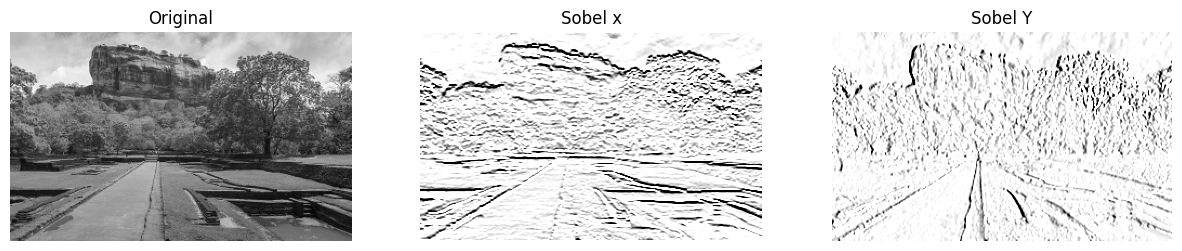

In [45]:
sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

g_x = cv.filter2D(f, cv.CV_32F, sobel_x)
g_y = cv.filter2D(f, cv.CV_32F, sobel_y)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(g_x + 255, cmap='gray', vmin=0, vmax=255) # increase brightness
ax[1].set_title('Sobel x')
ax[1].axis('off')
ax[2].imshow(g_y + 255, cmap='gray', vmin=0, vmax=255) # increase brightness
ax[2].set_title('Sobel Y')
ax[2].axis('off')
plt.show()

In [46]:
g_x.dtype # by CV_32F type we can store negative floating point values also

dtype('float32')